## Using Naive Bayes Models To Predict Sleep Patterns Based On Average Daily Action Counts

In [ ]:
#authored by Tom Odem on 19 November 2023

### Imports

In [1]:
import modules
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB, CategoricalNB
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
X = modules.get_and_avg_data() #get data averaged over 7 day increments
Y = X['avg_sleep'].copy() #extract labels from set
X = X.drop(labels=['depression_class','avg_sleep'], axis = 1) #drop the depression class because we will be using the depression scores instead and drop avg_sleep because those are our labels
X = X.apply(modules.categorize_column, axis=0) #categorize the columns into 3 categories 0 = less than average, 1 = average, 3 = more than average
Y = modules.categorize_column(Y) #categorize labels in the same way

no user_tags: 501
no user_tags: 503
no user_tags: 507
no user_tags: 520
no user_tags: 523
no user_tags: 529
no user_tags: 532
no user_tags: 544
no user_tags: 547
no user_tags: 634
no user_tags: 658
no user_tags: 661
no user_tags: 662
no user_tags: 664
no user_tags: 668


For averaged user data, our data is obtained via three different file models: user_information.csv, which lists every user who participated in the study, user_tag files, which are individual files for each user that documents every action that was recorded throughout the study, and user_data files, which documents exact times that activity tags are triggered and also records the user's step amount at each tag trigger. The function get_and_avg_data() first opens the user_data file and user_tag data file for a user and computes the amount they slept, number of times they ate, number of times they drank, number of times they completed a self care act, and the amount of steps they took for everyday the user had data recorded. After getting the daily counts, the function computes averages over avg_of_n_days days, which is a user defined function parameter. This is done by selecting the first avg_of_n_days day from the daily data and computing the average of every feature. These averages, along with the user's depression information, is then appended as an individual new user to an averages dataframe. We then select the next avg_of_n_days days and compute averages , then the next, and so on until we reach the end of the recorded days. This is done for each user in which we have files for, to get a final number of 37-users-with-files * (number-of-days-recorded-for-user / avg_of_n_days) data points to train and classify with.
One might think, "why not average over all days for each user?" While that would be optimal, we only have 37 users who actually had retrievable data, and trying to train these big fancy models with only 37 data points would not be very productive. So, we split the data up into countless new users based on average over days. In essence, all of the new "pseudo-users" created from a single user are treated as individual users who just happen to have the same depression information. Since we are trying to find patterns in depression based on daily activity within a population, we can assume that this small population can also represent a wider range of population, which is simulated via these averages.

We are trying to predict sleep, so our labels will be average daily sleep amount, while our data points will consist of the remaining 5 features: steps, amount of eating, amount of drinking, amount of self care, and depression score. These numerical values, both labels and features, are all continuous, which is not good for a Naive Bayes model. To remedy this, we run each feature through a function that categorizes this continuous data into three categories. The function first takes the mean and standard deviation of the feature, then categorizes the data based on it's distance from one standard deviation from the mean. If a value is less than one standard deviation from the mean, it is labeled as less than average(0). If a value is greater than one standard deviation from the mean, it is labeled as greater than average(2). If a value falls within one standard deviation of the mean, then it is labeled as average(1). This categorization is done for both the labels and all data point features. So, we are now predicting "less than average", "more than average", or "average" amount of sleep.

### Using 10-fold cross validation to find the best model

In [9]:
#evaluate categorical naive bayes

k_fold = KFold(n_splits=10, shuffle=True, random_state=57) #define how many k-folds we want, shuffle the data when choosing
clf = CategoricalNB(alpha=1) #we are testing categorical naive bayes with an alpha of 1
accuracy_scores = cross_val_score(clf, X, Y, cv=k_fold, n_jobs=1) #evaluate the above defined model using 10-fold cross validation
print(f'average accuracy given by 10-fold cross validation Naive Bayes with alpha of 1: {np.mean(accuracy_scores)}')

k_fold = KFold(n_splits=10, shuffle=True, random_state=57) #define how many k-folds we want, shuffle the data when choosing
clf = CategoricalNB(alpha=2) #we are testing categorical naive bayes with an alpha of 2
accuracy_scores = cross_val_score(clf, X, Y, cv=k_fold, n_jobs=1) #evaluate the above defined model using 10-fold cross validation
print(f'average accuracy given by 10-fold cross validation Naive Bayes with alpha of 2: {np.mean(accuracy_scores)}')

average accuracy given by 10-fold cross validation Naive Bayes with alpha of 1: 0.7148572884811417
average accuracy given by 10-fold cross validation Naive Bayes with alpha of 2: 0.7148572884811417


In [10]:
#evaluate multinomial naive bayes

k_fold = KFold(n_splits=10, shuffle=True, random_state=57) #define how many k-folds we want, shuffle the data when choosing
clf = MultinomialNB(alpha=1) #we are testing multinomial naive bayes with an alpha of 1
accuracy_scores = cross_val_score(clf, X, Y, cv=k_fold, n_jobs=1) #evaluate the above defined model using 10-fold cross validation
print(f'average accuracy given by 10-fold cross validation Naive Bayes with alpha of 1: {np.mean(accuracy_scores)}')

k_fold = KFold(n_splits=10, shuffle=True, random_state=57) #define how many k-folds we want, shuffle the data when choosing
clf = MultinomialNB(alpha=2)#we are testing multinomial naive bayes with an alpha of 2
accuracy_scores = cross_val_score(clf, X, Y, cv=k_fold, n_jobs=1) #evaluate the above defined model using 10-fold cross validation
print(f'average accuracy given by 10-fold cross validation Naive Bayes with alpha of 2: {np.mean(accuracy_scores)}')

average accuracy given by 10-fold cross validation Naive Bayes with alpha of 1: 0.6934760448521916
average accuracy given by 10-fold cross validation Naive Bayes with alpha of 2: 0.6934760448521916


We tested both a categorical Naive Bayes and a multinomial Naive Bayes based approach to train on and classify our data. We chose to only use these two due to a couple of reasons. First, our data is just not suited for some other types of Naive Bayes implementations because of various reasons including our data not being binary valued categories, not being too unbalanced, among others. Secondly, these models intuitively fit the data more. Looking at the categorical approach, our data was transformed into categories to change them to discrete values, which seems perfect for a model named "categorical Naive Bayes". For the multinomial approach, we read a research paper about spam filtering that had a section that described different versions of Naive Bayes, and we selected the model that fit our data the most (Metsis). Since our data is basically just averages of counts, it may prove to be multinomial like. 

We tested both models using 10-fold cross validation on the entire dataset to find which model performs best. We also tested each model with the most common Laplacian smoothing alpha values of 1 and 2. After running all four models, we found that the categorical approach was the more accurate model with an accuracy of 71.49%, while the multinomial approach achieved a 69.35% accuracy. The values of the alpha parameter did not change the accuracy between tests for either of the approaches. Because of this, we chose to use an alpha value of 1 for our trained model.

Metsis, Vangelis & Androutsopoulos, Ion & Paliouras, Georgios. (2006). Spam Filtering with Naive Bayes - Which Naive Bayes?. In CEAS. 

### Training and evaluating a model based on the best found model

In [11]:
#split up our data into trains and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 68)

In [14]:
#train and evaluate the categorical naive bayes

clf = CategoricalNB(alpha=1) #define the model
clf.fit(X_train, Y_train) #fit the model
Y_pred = clf.predict(X_test) #predict the labels of test set
accuracy = accuracy_score(Y_pred, Y_test) #compute the accuracy
print(f'Accuracy of Naive Bayes model: {accuracy}')

Accuracy of Naive Bayes model: 0.6972477064220184


In [15]:
#train and evaluate the multinomial naive bayes

clf = MultinomialNB(alpha=1) #define the model
clf.fit(X_train, Y_train) #fit the model
Y_pred = clf.predict(X_test) #predict the labels of test set
accuracy = accuracy_score(Y_pred, Y_test) #compute the accuracy
print(f'Accuracy of Naive Bayes model: {accuracy}')

Accuracy of Naive Bayes model: 0.6146788990825688


<BarContainer object of 2 artists>

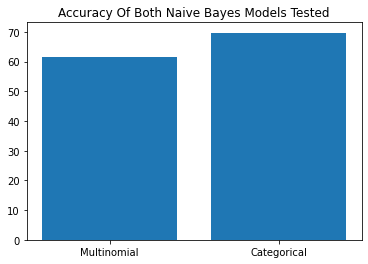

In [3]:
models = ['Multinomial', 'Categorical']
accuracies = [61.5, 69.72]
plt.title('Accuracy Of Both Naive Bayes Models Tested')
plt.bar(models,accuracies)

Using a categorical Naive Bayes, we trained on a training set and evaluated on a test set, using a 90-10 split. The model used an alpha value of 1 for Laplacian smoothing. This model gave us an accuracy of 69.72%. What this means in terms of the data is that if we are given a user's average daily habits, we can predict if they get more than average, less than average, or an average amount of sleep with 69.72% accuracy. This is much better than if we had used the multinomial Naive Bayes, which gave an accuracy of 61.47% using the same parameters and training set.